In [16]:
!pip install wordcloud


from wordcloud import WordCloud


In [17]:
import zipfile

# Extract your exact file
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("sentiment_data")


In [18]:
import os
print(os.listdir("sentiment_data"))


['twitter_training.csv', 'twitter_validation.csv']


In [19]:
import pandas as pd

train = pd.read_csv("sentiment_data/twitter_training.csv", header=None)
val = pd.read_csv("sentiment_data/twitter_validation.csv", header=None)

columns = ["id", "topic", "sentiment", "text"]
train.columns = columns
val.columns = columns

train.head()


,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [20]:
print(train.shape)
print(train.isnull().sum())
print(train["sentiment"].value_counts())


(74682, 4)
id             0
topic          0
sentiment      0
text         686
dtype: int64
sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [21]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)   # remove URLs, mentions, hashtags
    text = re.sub(r"[^a-zA-Z ]", "", text)         # remove special characters
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

train["clean_text"] = train["text"].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
train[["text","clean_text"]].head(3)


,text,clean_text
0,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,I am coming to the borders and I will kill you...,coming borders kill
2,im getting on borderlands and i will kill you ...,im getting borderlands kill


In [23]:
print(train["clean_text"].iloc[0])


im getting borderlands murder


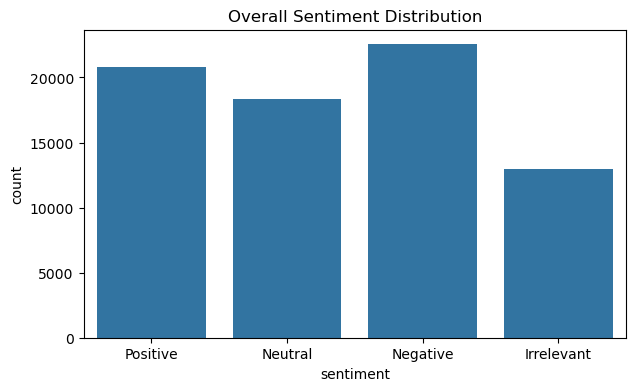

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(x="sentiment", data=train)
plt.title("Overall Sentiment Distribution")
plt.show()


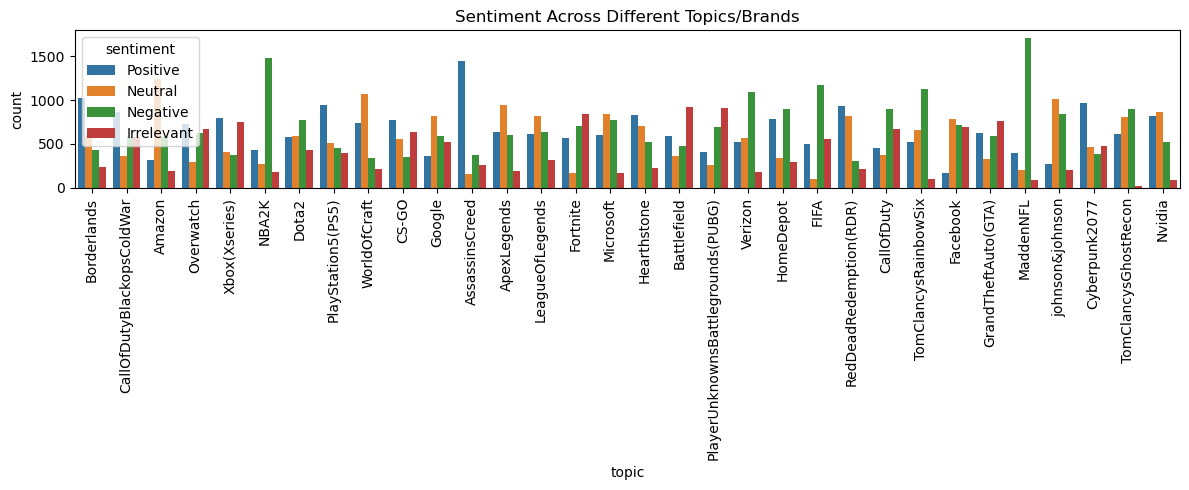

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(x="topic", hue="sentiment", data=train)
plt.xticks(rotation=90)
plt.title("Sentiment Across Different Topics/Brands")
plt.tight_layout()
plt.show()


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(train["clean_text"])
y = train["sentiment"]


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [29]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6742317734484836
              precision    recall  f1-score   support

  Irrelevant       0.67      0.50      0.57      2592
    Negative       0.72      0.76      0.74      4519
     Neutral       0.60      0.64      0.62      3596
    Positive       0.69      0.72      0.71      4230

    accuracy                           0.67     14937
   macro avg       0.67      0.65      0.66     14937
weighted avg       0.67      0.67      0.67     14937



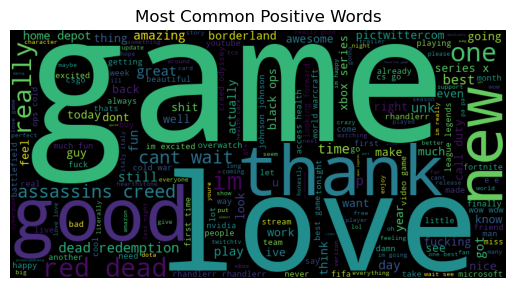

In [30]:
from wordcloud import WordCloud

positive_text = " ".join(train[train["sentiment"]=="Positive"]["clean_text"])

wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Positive Words")
plt.show()


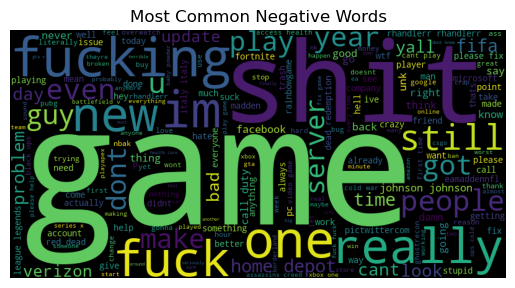

In [31]:
negative_text = " ".join(train[train["sentiment"]=="Negative"]["clean_text"])

wordcloud = WordCloud(width=800, height=400).generate(negative_text)

plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Negative Words")
plt.show()


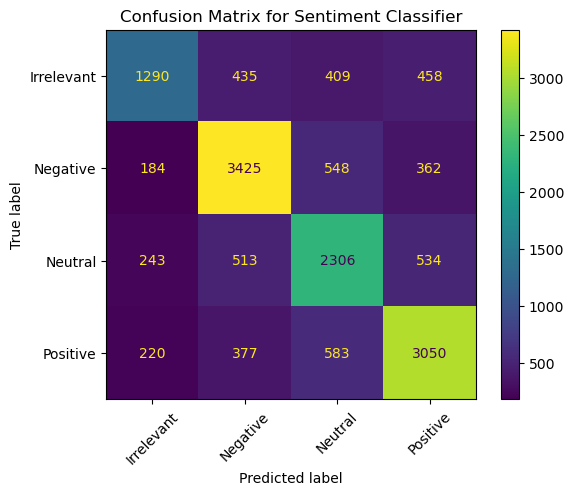

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

disp.plot()
plt.xticks(rotation=45)
plt.title("Confusion Matrix for Sentiment Classifier")
plt.show()


In this project, I analyzed and visualized sentiment patterns in social media data to understand public opinion toward different topics and brands. I performed text cleaning, explored overall sentiment distribution, compared sentiment across brands, and built a Logistic Regression model using TF-IDF features to classify sentiment. The visualizations, including sentiment bar charts and word clouds, revealed key patterns in public attitudes, while the confusion matrix and accuracy score demonstrated the performance of the predictive model